## 1.1 Import Data
Download Data from https://analyse.kmi.open.ac.uk/open_dataset and save it to the same folder as this Jupyter Notebook. After this task was completed successfully we'll import the Library _Pandas_, which helps to handle huge data sets more easily and performs vector operations with high speed. 

In [1]:
import pandas as pd

studentRegistration = pd.read_csv(filepath_or_buffer='..//..//OULAD//studentRegistration.csv', sep=',')
assessments = pd.read_csv(filepath_or_buffer='..//..//OULAD//assessments.csv', sep=',')
courses = pd.read_csv(filepath_or_buffer='..//..//OULAD//courses.csv', sep=',')
studentAssessment = pd.read_csv(filepath_or_buffer='..//..//OULAD//studentAssessment.csv', sep=',')
studentRegistration = pd.read_csv(filepath_or_buffer='..//..//OULAD//studentRegistration.csv', sep=',')
studentVle = pd.read_csv(filepath_or_buffer='..//..//OULAD//studentVle.csv', sep=',')
vle = pd.read_csv(filepath_or_buffer='..//..//OULAD//vle.csv', sep=',')
studentInfo = pd.read_csv(filepath_or_buffer='..//..//OULAD//studentInfo.csv', sep=',')

After importing all tables successfully into our Notebook, we can look into a data frame typing DataFrame_name.head(n), where n is the number of lines shown. <br>


In [2]:
studentInfo.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [3]:
assessments.head(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
studentRegistration.head(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [5]:
courses.head(5)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [6]:
studentAssessment.head(5)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [7]:
studentVle.head(5)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [8]:
vle.head(5)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


After we've explored our dataset a bit, we can start to make the first assumptions and the try to prove them with the dataset.

## 2.1 Can we find a link between the time of enrollment in a course and the final exam results?
<br>
To verify if there is a  correlation between _time of enrollment_ and _exam score_, we'll first need to prepare a data frame, where every row represents a student, module combination with the two variables time of enrollment in days and final exam score. Correlations can be very helpful in finding links between different variables, as they're easy to calculate, but should be treated with caution as they can be misleading from time to time as shown in the graphic below. There we can see an almost perfect correlation, between autism diagnoses and the sale of organic foods, but since a causation between these two variables cannot be established these findings are not relevant.

![title](https://i0.wp.com/media.boingboing.net/wp-content/uploads/2013/01/1WZ6h.png?w=970)

First we'll merge the two data frames _assessments_ and _studentAssessment_ on the key _id_\_assessment_ to connect the assessments of the students to the modules and different presentations, so we can split the into different groups and analyze them separately.

In [9]:
exam_assessments = pd.merge(assessments, studentAssessment, on='id_assessment')
exam_assessments = exam_assessments[exam_assessments['assessment_type'] == 'Exam']
exam_assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0


Now we merge our new data frame with the table _studentRegistration_ to get the information when a student enrolled into the course

In [10]:
exam_assessments_with_registration_date = pd.merge(exam_assessments, studentRegistration, \
                                                   on=['code_module', 'code_presentation', 'id_student'], \
                                                   how='inner')
exam_assessments_with_registration_date.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,date_registration,date_unregistration
0,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0,-74.0,NaN
1,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0,-22.0,NaN
2,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0,-22.0,NaN
3,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0,-281.0,NaN
4,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0,-28.0,NaN


Now that we've successfully aggregated the cells we can investigate, if there exists a correlation. With df.corr() we can calculate the Pearson product-moment correlation coefficient (PPMCC) which returns a value between -1 and +1. -1 Meaning total negative correlation, +1 total positive correlation and 0 no linear correlation. The calculation of the PPMC is shown below.

In [11]:
from IPython.display import Math
Math(r'\text{PPMC} \\ \rho(X,Y) = \frac{cov(X,Y)}{\sigma_X \cdot \sigma_Y} \\ cov \text{ is the covariance} \\ \sigma_Y \text{ is the standard derivation of } Y \\ \sigma_X \text{ is the standard derivation of } X')

<IPython.core.display.Math object>

In [12]:
exam_assessments_with_registration_date[['score', 'date_registration']].corr()

,score,date_registration
score,1.000000,0.024529
date_registration,0.024529,1.000000


From the data frame above we can read that there is close to no correlation, meaning that it's very likely that a prediction for exam results based on the time of enrollment won't be successful.
With seaborn, a library for visualizations, we can print a scattered plot with a regression line that fits the data points best.

In [13]:
import seaborn as sns
sns.lmplot(x='date_registration',y='score',data=exam_assessments_with_registration_date,scatter_kws={'alpha':0.07},\
           fit_reg=True, line_kws={'color': 'red'}).set(xlabel='time of enrolement relative to course start',\
                                                        ylabel='final exam score')

In the plot above we can see that the regression line is is almost vertical because of the low PPMC. Also there doesn't seem to be a pattern which shows that there might be a correlation between _time of enrollment_ and _final exam score_
### Conclusion
As expected from the low PPMC we don't get a clear picture for our prediction, because there seems to be no connection between the time of enrollment and exam results, since a coefficient of 0.024529 is considered random. But this is still helpful because we know now that we don't have consider time of enrollment any more when it comes to predictions about the final exam. In the next examinations we'll try to combine other variables with the final exam points to find a pair with a higher coefficient.

## 2.2 Cause higher exercise points higher final grades?
Next we want to examine if the exercise points gathered by the students during the semester are a better method to predict the  likelihood  of a student succeeding the course.
First we'll create another a data frame with the same key combination (id_student, code_module), but now with the new variables _sore_\__exam_ and _score_\__non_\__exam_. Where _score_\__non_\__exam_ are assessments that get evaluated by a tutor or a computer and take place regularly during the semester.

In [14]:
# ohne Examen
non_exam_assessments = pd.merge(assessments, studentAssessment, on='id_assessment')
non_exam_assessments = non_exam_assessments[non_exam_assessments.assessment_type != 'Exam']
grouped_assessments = non_exam_assessments[['id_student', 'code_module', 'code_presentation', 'score']].groupby(['id_student', 'code_module', 'code_presentation']).sum().reset_index()

# mit Examen
exam_assessments = pd.merge(assessments, studentAssessment, on='id_assessment')
exam_assessments = exam_assessments[exam_assessments.assessment_type == 'Exam']
grouped_exam_assessments = exam_assessments[['id_student', 'code_module', 'code_presentation', 'score']].groupby(['id_student', 'code_module', 'code_presentation']).sum().reset_index()

assessment_eval = pd.merge(grouped_exam_assessments[['id_student', 'code_module', 'code_presentation', 'score']], grouped_assessments[['id_student', 'code_module', 'code_presentation', 'score']], on=['id_student', 'code_module', 'code_presentation'], suffixes=('_exam', '_non_exam'))
assessment_eval.head()


,id_student,code_module,code_presentation,score_exam,score_non_exam
0,23698,CCC,2014J,80.0,590.0
1,24213,DDD,2014B,58.0,476.0
2,27116,CCC,2014J,96.0,744.0
3,28046,DDD,2013J,40.0,306.0
4,28787,CCC,2014J,44.0,224.0


In [15]:
assessment_eval[['score_exam', 'score_non_exam']].corr()

,score_exam,score_non_exam
score_exam,1.000000,0.270082
score_non_exam,0.270082,1.000000


In the cell above we can see that the PPMCC (see above) is  significantly  higher, which can be interpreted in a way that these two  variables have a much higher significance than the others in our test before. But 0.270082 is still not a remarkable strong correlation coefficient, but can be interpreted as a hint that we're on the right path. <br>
Now we want to plot the scatter plot to visualize the dependencies of the variables.

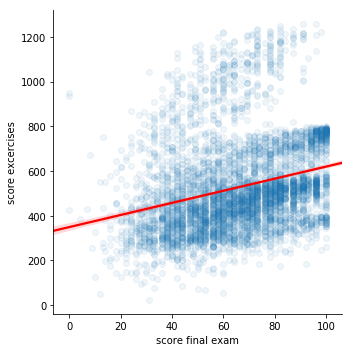

In [16]:
sns.lmplot(x='score_exam',y='score_non_exam',data=assessment_eval,fit_reg=True, \
           scatter_kws={'alpha':0.07}, line_kws={'color': 'red'}).set(xlabel='score final exam',\
                                                        ylabel='score excercises')

After plotting we can confirm that there is also a visual correlation between exercise points and exam points, as we can see the points seem to get higher on the x axis the higher the y value is. <br>
Now we can look into the different modules and explore if there is any difference. <br>
With 'assessment_eval.code_module.unique()' we get a list of the distinct code_modules over which we'll iterate to get results from each module. First we'll take a look at the correlation matrix and then take a look into the scatter plot.

In [17]:
corr_module = pd.DataFrame()
module_list = list()
for module in assessment_eval['code_module'].unique():
    module_list += [module, module]
    corr_module = pd.concat([assessment_eval[['score_exam', 'score_non_exam']]\
                   [assessment_eval.code_module == module].corr(), corr_module])
corr_module['module'] = module_list[::-1]
corr_module = corr_module.set_index(['module', corr_module.index])
corr_module

score_exam  score_non_exam
module                                           
DDD    score_exam        1.000000        0.134523
       score_non_exam    0.134523        1.000000
CCC    score_exam        1.000000        0.513080
       score_non_exam    0.513080        1.000000

In the output above we can see that the PPMCC diverges notably in the two modules. This is a very important finding since it can have two meanings. Either in module CCC exercise are more connected to the final exam and therefore are a better indicator if a student passes or not than in module DDD, or we have to deal with an effect were correlations can disappear when a dataset is aggregated. After seeing this differences we should definitely examine module DDD more closely. To do this, we'll print out a scatter plot of Module CCC and DDD to see if there are any visual differences.

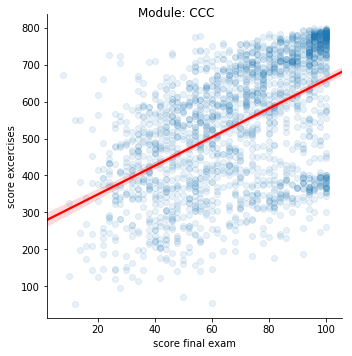

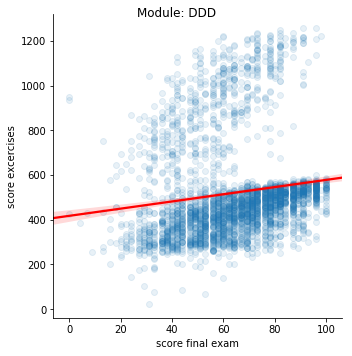

In [18]:
for code_module in assessment_eval.code_module.unique():
    scatter_plot = sns.lmplot(x='score_exam',y='score_non_exam', scatter_kws={'alpha':0.1},\
                              data=assessment_eval[assessment_eval.code_module==code_module],\
                              fit_reg=True, line_kws={'color': 'red'}).set(xlabel='score final exam',\
                                                        ylabel='score excercises') 
    fig = scatter_plot.fig
    fig.suptitle("Module: {}".format(code_module), fontsize=12)

As expected the visual representation is different in both modules. In the module _DDD_ we can see 2 clusters, one bigger in the bottom part of the chart and a smaller one in the upper half. If data points are scattered like in the module _DDD_ graph, we've to ask our self why there seem to be different clusters and how we can separate them to improve our correlation coefficient. Since we know from the data set description, that the data was accumulated over several semesters we can assume that these clusters formed because something changed in the course. <br>
To separate the different groups visually, we can plot the data again with the same code, but this time we'll also specify the variable _hue_ which assigns a different color to each semester.

Text(0.5, 0.98, 'Module: DDD')

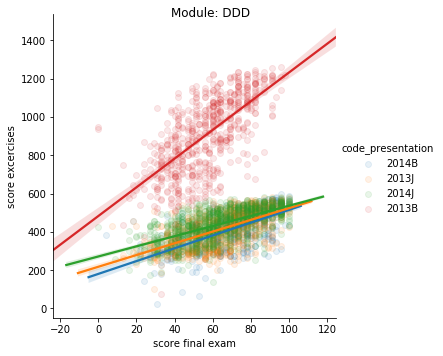

In [19]:
scatter_plot = sns.lmplot(x='score_exam',y='score_non_exam', scatter_kws={'alpha':0.1},\
                          data=assessment_eval[(assessment_eval.code_module=='DDD')],hue='code_presentation').set(xlabel='score final exam',\
                                                    ylabel='score excercises') 
fig = scatter_plot.fig
fig.suptitle("Module: {}".format(code_module), fontsize=12)

As we can see in the scatter plot above, we could identify the reason of the different clusters. In the Semester _2013B_ it looks like the maximum amount of points that could be scored during the semester was higher. This tells us that we've to norm the exercise points (e.g. calculate percentage of points reached) of the students to get better predictions. <br>
Finally we want to calculate the PPMC of the different semesters

In [20]:
corr_DDD_presentation = pd.DataFrame()
presentation_list = list()
for presentation in assessment_eval[(assessment_eval.code_module == 'DDD')]['code_presentation'].unique():
    presentation_list += [presentation, presentation]
    corr_DDD_presentation = pd.concat([assessment_eval[['score_exam', 'score_non_exam']]\
                   [(assessment_eval.code_module == 'DDD') & (assessment_eval.code_presentation == presentation)].corr(),
                   corr_DDD_presentation])
corr_DDD_presentation['presentation'] = presentation_list[::-1]
corr_DDD_presentation = corr_DDD_presentation.set_index(['presentation', corr_DDD_presentation.index])
corr_DDD_presentation

score_exam  score_non_exam
presentation                                           
2013B        score_exam        1.000000        0.658489
             score_non_exam    0.658489        1.000000
2014J        score_exam        1.000000        0.637596
             score_non_exam    0.637596        1.000000
2013J        score_exam        1.000000        0.618482
             score_non_exam    0.618482        1.000000
2014B        score_exam        1.000000        0.635166
             score_non_exam    0.635166        1.000000

In the table above we the PPMC was  calculated  for each semester. <br>
As expected we get a higher PPMC when we separate the different semesters. With a PPMC being around 0.63 we've found a statistical significant correlation.
### Conclusion
When we examined the two modules that use rated exercises, _CCC_ and _DDD_, we found that both modules have a PPMC over 0.5. This means that exercise points are a statistical relevant estimator to predict the _final exam points_ of a student. The exercise points of a student could also be used to find students who need additional material or courses to pass a module.

## 2.3 Are there parallels between the students interactions with course materials and their understandings of the subject matter?
From the analysis above we could conclude that there is a correlation between exercise points and exam points. But why do certain students seem to have a better understanding of the exercises and are therefore better in the final exams? <br>
To investigate this circumstance we want to explore the click data of the students in the virtual learning environment (_vle_) and try to find groups that have a similar behavior. Ideally these groups will also have similarities in their mean exercise points or pass rate like the cluster they were assigned to. For building groups and classification tasks, K-means is a very common algorithm that helps to find clusters in a big data set.
K-Means is an algorithm that can be best imagined in a 3-dimensional space, where it places K spheres around the data points. K is the number of clusters that fit the dataset, where K is an integer greater than zero. The algorithm places the center and radius of the spheres to reduce the combined distance of each data point to it's sphere center to a minimum. <br>
Clustering over so many variables will result in a large number of detailed clusters, which will be more exact than they need to be since we're more interested in the bigger picture. Why reducing the number of variable results in better clusters can be imagined best when we think about a weekend where we expect students to study and take time off to relax. We don't want to put a student who studied more on Saturday than on Sunday in a different cluster than a student that did it the other way around. This means we want to put students that study more in a similar day range (like on a weekend) in the same cluster. To reduce the selectivity of the K-means algorithm we'll need to prepare the data set accordingly. A common practice to reduce the dimensionality and selectivity of a data set is the principal component analysis (pca). We can specify the numbers of components onto whom we want to reduce our data set to. The number of components should be greater than zero and smaller than the number of features we have (in our example the features are the days). In short the pca will take all features, find correlations among them and compute them to new features that have a greater entropy. Since we can determine the number of components (new features) we can control the dimensionality of our new data set. <br>
Our first goal will be to aggregate the data to a table where we've a column for each day of the semester and one row per student and course.

In [21]:
vle_interactions = pd.merge(studentVle, vle[['id_site', 'code_module', 'code_presentation', 'activity_type']], on=['code_module', 'code_presentation', 'id_site'])

First we merge the two tables vle and studentVle, to connect the information of the vle with the click events from the students

In [22]:
vle_interactions.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546652,-10,8,forumng
4,AAA,2013J,30268,546652,-10,3,forumng


In [23]:
interactions_agg_student_module_day = vle_interactions[['code_module', 'code_presentation', 'id_student', 'date', 'sum_click']].groupby(['code_module', 'code_presentation', 'id_student', 'date']).sum().reset_index()

Below we've a table with the total number of clicks per student per day per module per semester

In [24]:
interactions_agg_student_module_day.head()

,code_module,code_presentation,id_student,date,sum_click
0,AAA,2013J,11391,-5,98
1,AAA,2013J,11391,0,49
2,AAA,2013J,11391,1,127
3,AAA,2013J,11391,2,4
4,AAA,2013J,11391,6,3


Now we need to fill in the days where the students weren't active. If we would iterate with a for loop over the data frame it would take quite some time to compute this simple operation, reason being the large table we've created. Thats why it's more efficient to us the operation merge. We will create a dummy data frame with all possible days on whom we'll merge our _interactions__agg_student_module_day_ fill all empty values with zero.

In [25]:
df_days = pd.DataFrame({'date': [day for day in range(-100,401)], 'dummy': 1})
df_unique_student_module_presentation = interactions_agg_student_module_day[['code_module', 'code_presentation', 'id_student']].drop_duplicates()
df_unique_student_module_presentation['dummy'] = 1
df_unique_student_module_presentation = pd.merge(df_days, df_unique_student_module_presentation, on='dummy', how='left')
del df_unique_student_module_presentation['dummy']
df_unique_student_module_presentation.ffill()
df_unique_student_module_presentation = pd.merge(df_unique_student_module_presentation, interactions_agg_student_module_day,\
                                                on=['code_module', 'code_presentation', 'id_student', 'date'], how='left')
df_unique_student_module_presentation['sum_click'] = df_unique_student_module_presentation['sum_click'].fillna(0)

Since not all modules have the same presentation length, we need to cut off the dummy days that are not between start and end of the module

In [26]:
for module in df_unique_student_module_presentation.code_module.unique():
    for presentation in df_unique_student_module_presentation[df_unique_student_module_presentation.code_module == module].code_presentation.unique():
        min_date = interactions_agg_student_module_day[(interactions_agg_student_module_day.code_presentation == presentation) & \
                                                        (interactions_agg_student_module_day.code_module == module)]['date'].min()
        max_date = interactions_agg_student_module_day[(interactions_agg_student_module_day.code_presentation == presentation) & \
                                                        (interactions_agg_student_module_day.code_module == module)]['date'].max()
        df_unique_student_module_presentation = df_unique_student_module_presentation[~((df_unique_student_module_presentation.code_module == module) & \
                                                                                     (df_unique_student_module_presentation.code_presentation == presentation) &\
                                                                                     ((df_unique_student_module_presentation.date < min_date) | \
                                                                                     (df_unique_student_module_presentation.date > max_date)))]

In [27]:
df_unique_student_module_presentation.head()

,date,code_module,code_presentation,id_student,sum_click
2207538,-25,DDD,2014J,8462,0.0
2207539,-25,DDD,2014J,25572,0.0
2207540,-25,DDD,2014J,27417,0.0
2207541,-25,DDD,2014J,33681,29.0
2207542,-25,DDD,2014J,33796,0.0


Above we can see a data frame were we have assembled all the data we need to preform our analysis.
In the cell below we can choose the module and presentation (when the module started) we want to examine.

In [28]:
module = 'CCC'
presentation = '2014J'

After we have prepared our dataset and selected module and presentation, we can pivot it to form it to it's final form, for the principal component analysis (PCA) and K-means.

In [29]:
studentvle_pivot = df_unique_student_module_presentation[(df_unique_student_module_presentation.code_module == module) & (df_unique_student_module_presentation.code_presentation == presentation)]
studentvle_pivot = studentvle_pivot[['date', 'id_student', 'sum_click']].pivot(index='id_student', columns='date', values='sum_click')
studentvle_pivot.head()

date,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,...,260,261,262,263,264,265,266,267,268,269
id_student,,,,,,,,,,,,,,,,,,,,,
23698,4.0,0.0,0.0,0.0,1.0,6.0,0.0,2.0,0.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25261,30.0,10.0,8.0,4.0,0.0,0.0,1.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27116,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,3.0
28787,0.0,5.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
28952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After pivoting, we'll preform the principal component analysis to reduce the data frame.

In [30]:
from sklearn.decomposition import PCA

n_components = 5
pca = PCA(n_components)
pca.fit(studentvle_pivot)

studentvle_pca = pd.DataFrame(pca.transform(studentvle_pivot), columns=['PCA%i' % i for i in range(n_components)], index=studentvle_pivot.index)

In [31]:
studentvle_pca.head()

,PCA0,PCA1,PCA2,PCA3,PCA4
id_student,,,,,
23698,-26.487352,-3.107130,4.325696,-13.753655,-15.043605
25261,-26.048528,1.658104,18.557949,-48.726114,-33.925607
27116,30.375342,-8.535894,11.407135,-18.994296,-27.448946
28787,-43.647153,-4.472908,-1.291855,-11.676473,20.584167
28952,-79.481405,1.407106,0.503276,-5.852390,22.684121


On this reduced data frame we can now apply the K-Means algorithm to find the optimal number of clusters and to divide the students into them, based on their behavior in the vle.

In [32]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = studentvle_pca
distorsions = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)



After calculating the squared errors for each number of clusters between 2 and 50 we can plot the elbow curve. As we can see below, with every cluster we add the error gets smaller, but the decline of the curve gets flatter with every added cluster. In the plot we can read the inflection point, which lies somewhere around 8. This means that 8 clusters are best to divide our dataset in cluster with the optimal balance between squared error and number of clusters.

Text(0.5, 1.0, 'Elbow curve')

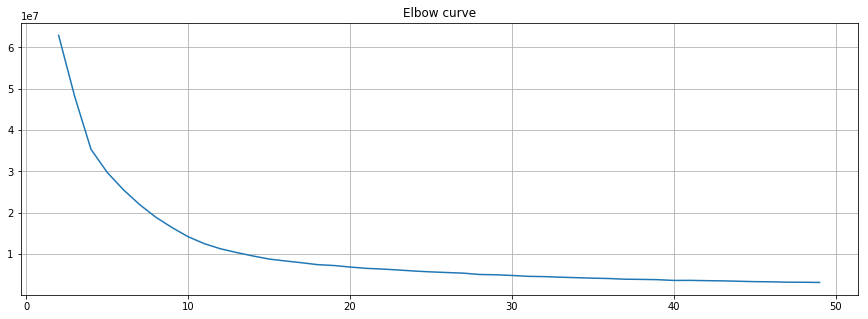

In [33]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [34]:
import numpy as np
n_cluster = 8
km = KMeans(n_cluster, random_state=100).fit(studentvle_pca)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = studentvle_pca.index.values
cluster_map['cluster'] = km.labels_

cluster_map = pd.merge(cluster_map, assessment_eval[(assessment_eval.code_module == module) & (assessment_eval.code_presentation == presentation)], left_on= 'data_index', right_on='id_student')
cluster_map['passed'] = np.where(cluster_map.score_exam >= 40, 1, 0)


After grouping the data into the cluster we can start to look into the clusters and examine if clustering by the online activities resulted in clusters that also have other similarities.

In [35]:
results = pd.DataFrame()

for cluster in range(0,n_cluster):
    ev = list()
    data_tmp = cluster_map[cluster_map.cluster == cluster]
    results.loc['size', cluster] = len(data_tmp)
    results.loc['rel_size', cluster] = len(data_tmp)/len(cluster_map)
    results.loc['mean_score_exam', cluster] = data_tmp.score_exam.mean()
    results.loc['mean_score_excercise', cluster] = data_tmp.score_non_exam.mean()
    results.loc['overall_mean_score_exam', cluster] = cluster_map.score_exam.mean()
    results.loc['mean_score_non_exam', cluster] = data_tmp.score_non_exam.mean()
    results.loc['overall_mean_score_non_exam', cluster] = cluster_map.score_non_exam.mean()
    results.loc['pass_rate', cluster] = data_tmp.passed.mean()
    results.loc['overall_pass_rate', cluster] = cluster_map.passed.mean()
    results.loc['rel_derivation_from_mean_exam_score', cluster] = (data_tmp.score_exam.mean() - cluster_map.score_exam.mean()) * 100 / data_tmp.score_exam.max()
    results.loc['rel_derivation_from_mean_excercise_score', cluster] = (data_tmp.score_non_exam.mean() - cluster_map.score_non_exam.mean()) * 100 / data_tmp.score_non_exam.max()
    results.loc['rel_derivation_from_mean_pass_rate', cluster] = (data_tmp.passed.mean() - cluster_map.passed.mean()) *100

The cluster sizes are quite unequal distributed, ranging from one up to 629 students. Also big differences in mean exam score and mean exercise score between the clusters show up, as well as differing pass rates. We can conclude from our findings that just with the number of actions per student per day we were able to find clusters of high performing students as well as students that might need further assistance to succeed in their academic career.

In [36]:
results

,0,1,2,3,4,5,6,7
size,629.000000,110.000000,1.000000,13.000000,1.000000,217.000000,196.000000,1.000000
rel_size,0.538527,0.094178,0.000856,0.011130,0.000856,0.185788,0.167808,0.000856
mean_score_exam,66.550079,75.145455,64.000000,79.230769,40.000000,76.433180,60.244898,44.000000
mean_score_excercise,529.430843,615.181818,489.000000,646.230769,225.000000,615.617512,488.428571,364.000000
overall_mean_score_exam,68.234589,68.234589,68.234589,68.234589,68.234589,68.234589,68.234589,68.234589
mean_score_non_exam,529.430843,615.181818,489.000000,646.230769,225.000000,615.617512,488.428571,364.000000
overall_mean_score_non_exam,547.501712,547.501712,547.501712,547.501712,547.501712,547.501712,547.501712,547.501712
pass_rate,0.850556,0.963636,1.000000,1.000000,1.000000,0.940092,0.806122,1.000000
overall_pass_rate,0.872432,0.872432,0.872432,0.872432,0.872432,0.872432,0.872432,0.872432
rel_derivation_from_mean_exam_score,-1.684510,6.910866,-6.616545,10.996180,-70.586473,8.198591,-7.989691,-55.078611


In [37]:
results = results.loc[:, results.loc["size"] > 10]

To further examine the cluster we drop the clusters having less than 10 students, as they are representing outliers, which leaves us with 5 clusters.

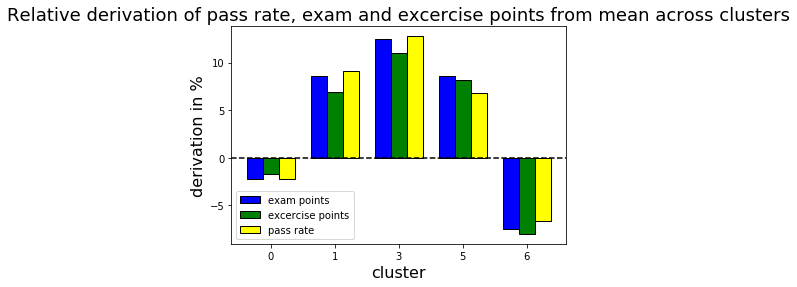

In [38]:
cluster=results.columns
assesment=['exam points','excercise points', 'pass rate']
pos = np.arange(len(cluster))
bar_width = 0.25
derivation_from_mean_excercise_score=list(results.loc['rel_derivation_from_mean_excercise_score'])
derivation_from_mean_exam_score=list(results.loc['rel_derivation_from_mean_exam_score'])
pass_derivation=list(results.loc['rel_derivation_from_mean_pass_rate'])
 
plt.bar(pos,derivation_from_mean_excercise_score,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,derivation_from_mean_exam_score,bar_width,color='green',edgecolor='black')
plt.bar(pos+(bar_width*2),pass_derivation,bar_width,color='yellow',edgecolor='black')
plt.xticks(pos+bar_width, cluster)
plt.xlabel('cluster', fontsize=16)
plt.ylabel('derivation in %', fontsize=16)
plt.title('Relative derivation of pass rate, exam and excercise points from mean across clusters',fontsize=18)
plt.legend(assesment,loc=3)
plt.axhline(0, color='black', linestyle='--')
plt.show()

Above we can see a bar chart that shows the relative derivation from the mean for exam points, exercise points and pass rate for the different clusters. The first thing to notice is that 3 clusters are well above average, one being close to average and one well below average. The two clusters below average, represent also the fast majority of students (around 70%). To get a better understanding of the clusters we examine the click rates that led to them.

In [39]:
cluster_activity = pd.DataFrame()
for cluster in results.columns:
    tmp_df = pd.merge(cluster_map[cluster_map.cluster == cluster],
                      vle_interactions, 
                      on=['id_student', 'code_module', 'code_presentation'])
    activities = tmp_df['activity_type'].value_counts()

    for i in activities.index:
        cluster_activity.loc[i, cluster] = activities[i]/results.loc['size'][cluster]
    #cluster_activity.loc['sum', cluster] = cluster_activity[cluster].sum()

In [40]:
cluster_activity

,0,1,3,5,6
quiz,69.453100,215.527273,545.461538,198.935484,100.469388
homepage,66.740859,112.290909,195.076923,143.188940,78.102041
subpage,56.624801,105.118182,167.307692,117.599078,80.122449
resource,50.184420,78.072727,109.923077,99.336406,63.841837
forumng,34.815580,154.936364,621.538462,269.935484,60.765306
oucontent,25.370429,66.700000,92.846154,74.400922,42.852041
url,6.176471,12.445455,24.769231,15.023041,7.887755
oucollaborate,1.634340,3.509091,3.153846,5.672811,3.489796
page,1.279809,2.163636,3.076923,2.322581,1.576531


In the table above we've splitted the total clicks of each cluster into the 9 types of content that were available in this module. Now we'll first create a bar chart that shows the mean clicks per student in a semester of the respected cluster. Following this we'll take a look how the different clicks were distributed on the different types of content.

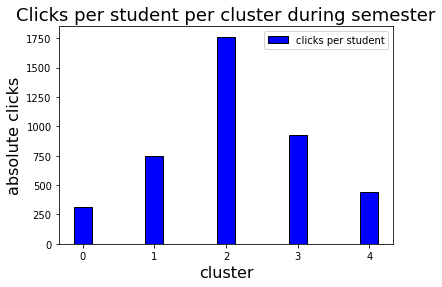

In [41]:
clicks_per_student_per_cluster = cluster_activity.sum()
clicks_per_student_per_cluster

plt.bar(pos,clicks_per_student_per_cluster,bar_width,color='blue',edgecolor='black')
plt.xlabel('cluster', fontsize=16)
plt.ylabel('absolute clicks', fontsize=16)
plt.title('Clicks per student per cluster during semester',fontsize=18)
plt.legend(['clicks per student'],loc=1)
plt.show()

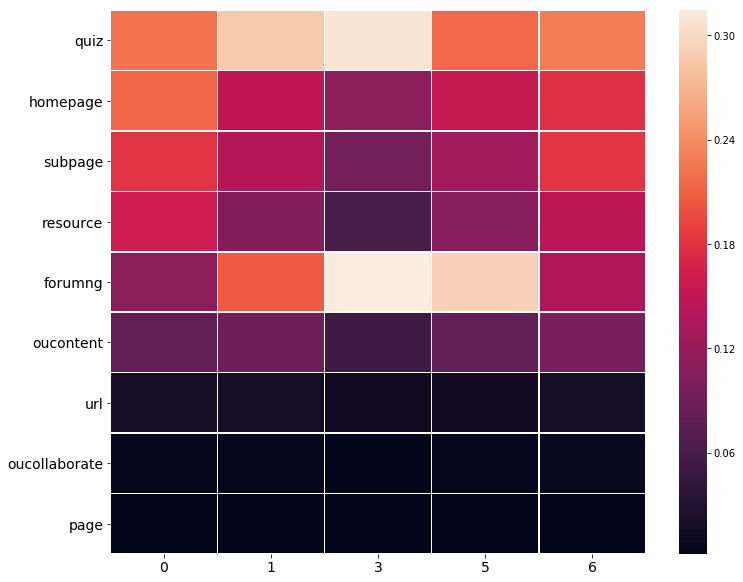

In [42]:
#cluster_activity = cluster_activity.T
ax = sns.heatmap(cluster_activity.div(cluster_activity.sum(axis=0), axis=1), linewidths=.5 ,robust=True ,annot_kws = {'size':14})
ax.tick_params(labelsize=14)
ax.figure.set_size_inches((12, 10))

In bar chart we can see that cluster 1 and 5 accumulated more than 750 clicks during the semester and cluster 3 even over 1500 clicks. The clusters 0 and 6, which perform below average, only have around 400 clicks per semester. <br>
In the heat map we can look closer into the distribution of the clicks in the clusters. We can see that the high performing clusters spent the most clicks on _forumng_ and _quiz_ where the clusters 1 and 6 weren't so active in the forum.
### Conclusion

With the principal component analysis in combination with K-means we could divide students into different  clusters with different chances of succeeding a module by analyzing their behavior on the virtual learning environment. We could distinguish the clusters into 3 main types average, below and above average where the average group is made up of cluster 0 with 629 students, group above average consists of the clusters 1, 3 and 5 with a total of 340 students and the group below average gets covered by the cluster 6 with 196 students. From the data we've descried we can conclude that the distribution of clicks over the semester seems to be a good estimator if a student is doing well in their semester.

Next Chapter
- Data prep
- Modell so bauen das df mit f1 scores zurückgegeben wird, dass dann visualisieren
- f1 score erklären

In [107]:
data_till_days_after_start = 240

In [108]:
df_timeseries_for_RNN = df_unique_student_module_presentation[df_unique_student_module_presentation.date <= data_till_days_after_start]
df_timeseries_for_RNN.head()

,date,code_module,code_presentation,id_student,sum_click
2207538,-25,DDD,2014J,8462,0.0
2207539,-25,DDD,2014J,25572,0.0
2207540,-25,DDD,2014J,27417,0.0
2207541,-25,DDD,2014J,33681,29.0
2207542,-25,DDD,2014J,33796,0.0


In [109]:
non_exam_assesments_to_date = pd.merge(assessments[(assessments.assessment_type != 'Exam') & (assessments.date <= data_till_days_after_start)], studentAssessment, on='id_assessment')
non_exam_assesments_to_date.head()
#grouped_assessments_to_date = non_exam_assessments[['id_student', 'code_module', 'code_presentation', 'score']] \
#                            .groupby(['id_student', 'code_module', 'code_presentation']).sum().reset_index()
#grouped_assessments_to_date.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
0,AAA,2013J,1752,TMA,19.0,10.0,11391,18,0,78.0
1,AAA,2013J,1752,TMA,19.0,10.0,28400,22,0,70.0
2,AAA,2013J,1752,TMA,19.0,10.0,31604,17,0,72.0
3,AAA,2013J,1752,TMA,19.0,10.0,32885,26,0,69.0
4,AAA,2013J,1752,TMA,19.0,10.0,38053,19,0,79.0


In [110]:
df_timeseries_for_RNN = pd.merge(df_timeseries_for_RNN, non_exam_assesments_to_date[['date', 'id_student', 'code_module', 'code_presentation', 'score']], on=['id_student', 'code_module', 'code_presentation', 'date'], how='left')
df_timeseries_for_RNN['score'] = df_timeseries_for_RNN['score'].fillna(0)

In [111]:
df_timeseries_for_RNN['exercise_score_cumsum'] = df_timeseries_for_RNN.groupby(['id_student', 'code_presentation', 'code_module'])['score'].transform(pd.Series.cumsum).fillna(0)
df_timeseries_for_RNN['sum_click_cumsum'] = df_timeseries_for_RNN.groupby(['id_student', 'code_presentation', 'code_module'])['sum_click'].transform(pd.Series.cumsum)

In [112]:
df_timeseries_for_RNN.head()

,date,code_module,code_presentation,id_student,sum_click,score,exercise_score_cumsum,sum_click_cumsum
0,-25,DDD,2014J,8462,0.0,0.0,0.0,0.0
1,-25,DDD,2014J,25572,0.0,0.0,0.0,0.0
2,-25,DDD,2014J,27417,0.0,0.0,0.0,0.0
3,-25,DDD,2014J,33681,29.0,0.0,0.0,29.0
4,-25,DDD,2014J,33796,0.0,0.0,0.0,0.0


In [47]:
#a = df_unique_student_module_presentation[['code_module', 'code_presentation']].drop_duplicates()
#a

,code_module,code_presentation
2207538,DDD,2014J
2221706,AAA,2014J
2252828,BBB,2013J
2404053,CCC,2014B
2405734,CCC,2014J
2409250,DDD,2013J
2411018,DDD,2014B
2414745,EEE,2014B
2415369,EEE,2014J
2416466,FFF,2013B


In [113]:
#total_pivot = df_unique_student_module_presentation[['code_module', 'code_presentation', 'id_student']].drop_duplicates()
c = 0
for index, row in df_unique_student_module_presentation[['code_module', 'code_presentation']].drop_duplicates().iterrows():
    studentvle_pivot = df_unique_student_module_presentation[(df_unique_student_module_presentation.code_module == row.code_module) & (df_unique_student_module_presentation.code_presentation == row.code_presentation)]
    studentvle_pivot = studentvle_pivot[['date', 'id_student', 'sum_click']].pivot(index='id_student', columns='date', values='sum_click')
    studentvle_pivot['code_module'] = row.code_module
    studentvle_pivot['code_presentation'] = row.code_presentation
    #studentvle_pivot.head()
    if c == 0:
        total_pivot = studentvle_pivot
    else:
        total_pivot = pd.concat([total_pivot, studentvle_pivot], sort='False')
    c += 1
total_pivot = total_pivot.fillna(-1)
total_pivot = total_pivot.set_index([total_pivot.index, 'code_module', 'code_presentation'])
total_pivot.head()

,,,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,...,260,261,262,263,264,265,266,267,268,269
id_student,code_module,code_presentation,,,,,,,,,,,,,,,,,,,,,
8462,DDD,2014J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25572,DDD,2014J,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
27417,DDD,2014J,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
33681,DDD,2014J,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
33796,DDD,2014J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [114]:
intervall_length = (((total_pivot.columns[0])*-1)+data_till_days_after_start) 
total_pivot = total_pivot.iloc[:,0:(((total_pivot.columns[0])*-1)+data_till_days_after_start)]

In [115]:
n_components = 5
pca = PCA(n_components)
pca.fit(total_pivot)

total_pivot_pca = pd.DataFrame(pca.transform(total_pivot), columns=['PCA%i' % i for i in range(n_components)], index=total_pivot.index)
total_pivot_pca.head()

,,,PCA0,PCA1,PCA2,PCA3,PCA4
id_student,code_module,code_presentation,,,,,
8462,DDD,2014J,-88.043688,-5.632456,2.174817,3.093018,-5.445290
25572,DDD,2014J,-80.681372,0.174210,0.142905,2.334977,-2.990112
27417,DDD,2014J,-82.205379,-4.459193,1.458519,3.093787,-6.623933
33681,DDD,2014J,-88.862297,-6.597790,2.474056,3.062628,-5.880300
33796,DDD,2014J,-65.089406,-0.745507,2.521354,-6.740582,-3.250577


In [51]:
X = total_pivot_pca
distorsions = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

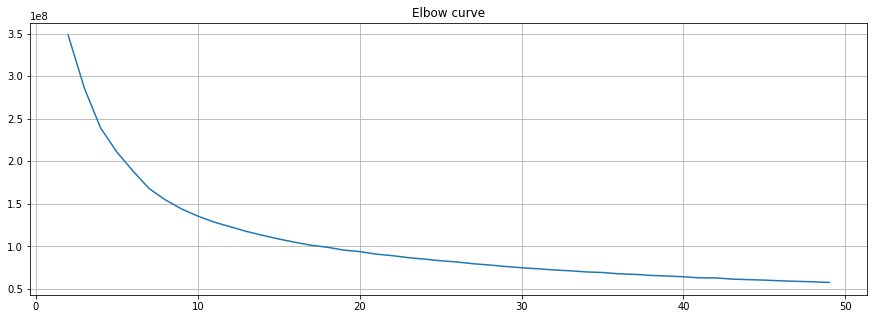

In [52]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [116]:
n_cluster = 8
km = KMeans(n_cluster, random_state=100).fit(total_pivot_pca)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = total_pivot_pca.index.values
total_pivot_pca['cluster'] = km.labels_
#total_pivot_pca = total_pivot_pca.iloc[:,'cluster']
total_pivot_pca = total_pivot_pca.reset_index()
total_pivot_pca.head()

,id_student,code_module,code_presentation,PCA0,PCA1,PCA2,PCA3,PCA4,cluster
0,8462,DDD,2014J,-88.043688,-5.632456,2.174817,3.093018,-5.445290,0
1,25572,DDD,2014J,-80.681372,0.174210,0.142905,2.334977,-2.990112,0
2,27417,DDD,2014J,-82.205379,-4.459193,1.458519,3.093787,-6.623933,0
3,33681,DDD,2014J,-88.862297,-6.597790,2.474056,3.062628,-5.880300,0
4,33796,DDD,2014J,-65.089406,-0.745507,2.521354,-6.740582,-3.250577,0


In [117]:
df_timeseries_for_RNN = pd.merge(df_timeseries_for_RNN,total_pivot_pca[['id_student', 'code_module', 'code_presentation', 'cluster']], on=['id_student', 'code_module', 'code_presentation'])
df_timeseries_for_RNN.head()

,date,code_module,code_presentation,id_student,sum_click,score,exercise_score_cumsum,sum_click_cumsum,cluster
0,-25,DDD,2014J,8462,0.0,0.0,0.0,0.0,0
1,-24,DDD,2014J,8462,0.0,0.0,0.0,0.0,0
2,-23,DDD,2014J,8462,0.0,0.0,0.0,0.0,0
3,-22,DDD,2014J,8462,0.0,0.0,0.0,0.0,0
4,-21,DDD,2014J,8462,0.0,0.0,0.0,0.0,0


In [119]:
df_timeseries_for_RNN = pd.merge(df_timeseries_for_RNN, studentInfo[(studentInfo.final_result == 'Fail') | (studentInfo.final_result == 'Pass')], on=['id_student', 'code_module', 'code_presentation']) 

In [121]:
df_timeseries_for_RNN.head()

,date,code_module,code_presentation,id_student,sum_click,score,exercise_score_cumsum,sum_click_cumsum,cluster,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,-25,DDD,2014J,33681,29.0,0.0,0.0,29.0,0,M,South East Region,A Level or Equivalent,50-60%,35-55,3,60,Y,Fail
1,-24,DDD,2014J,33681,0.0,0.0,0.0,29.0,0,M,South East Region,A Level or Equivalent,50-60%,35-55,3,60,Y,Fail
2,-23,DDD,2014J,33681,0.0,0.0,0.0,29.0,0,M,South East Region,A Level or Equivalent,50-60%,35-55,3,60,Y,Fail
3,-22,DDD,2014J,33681,0.0,0.0,0.0,29.0,0,M,South East Region,A Level or Equivalent,50-60%,35-55,3,60,Y,Fail
4,-21,DDD,2014J,33681,0.0,0.0,0.0,29.0,0,M,South East Region,A Level or Equivalent,50-60%,35-55,3,60,Y,Fail


In [128]:
df_timeseries_for_RNN = pd.get_dummies(df_timeseries_for_RNN, columns =['region', 'highest_education', 'imd_band', 'age_band', 'disability'])

In [129]:
df_timeseries_for_RNN.head()

,date,code_module,code_presentation,id_student,sum_click,score,exercise_score_cumsum,sum_click_cumsum,cluster,gender,...,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,-25,DDD,2014J,33681,29.0,0.0,0.0,29.0,0,M,...,1,0,0,0,0,0,1,0,0,1
1,-24,DDD,2014J,33681,0.0,0.0,0.0,29.0,0,M,...,1,0,0,0,0,0,1,0,0,1
2,-23,DDD,2014J,33681,0.0,0.0,0.0,29.0,0,M,...,1,0,0,0,0,0,1,0,0,1
3,-22,DDD,2014J,33681,0.0,0.0,0.0,29.0,0,M,...,1,0,0,0,0,0,1,0,0,1
4,-21,DDD,2014J,33681,0.0,0.0,0.0,29.0,0,M,...,1,0,0,0,0,0,1,0,0,1
